In [415]:
#a)load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set() 

import statistics

import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
Smartest Energy exercise
1. Create an api caller for BMRS Imbalance Prices (B1770) and Aggregated Imbalance Volumes (B1780). 
	 API documentation https://www.elexon.co.uk/documents/training-guidance/bsc-guidance-notes/bmrs-api-and-data-push-user-guide-2/. To obtain a API key is very simple and is well documented in the before user guide
2. Clean the inputs and produce two half hourly time series
3. Generate a message that provides the total daily imbalance cost and the daily imbalance unit rate.
4. Report which Hour had the highest absolute imbalance volumes.
5. Extra analysis or plotting will be appreciated. 

[1. Create an api caller for BMRS Imbalance Prices (B1770) and Aggregated Imbalance Volumes (B1780)](#LoadDataset)

[2. Clean the inputs and produce two half hourly time series](#Cleantheinputs)

[3. Generate a message that provides the total daily imbalance cost and the daily imbalance unit rate.](#Generateamessage)

[4. Report which Hour had the highest absolute imbalance volumes.](#Report)

[5. Extra analysis or plotting will be appreciated.](#Extraanalysis)


# <a id='LoadDataset'></a> 1 Create an api caller

We load the data from a URL link in format CSV file

In [478]:
First_period=1
Last_period=49
col_names=['Time Series ID','Business Type','Control Area','Settlement Date','Settlement Period','Imbalance Quantity (MAW)','Curve Type','Resolution','Document Type','Process Type','Active Flag','Document Status','Document ID','Document RevNum','Imbalance Quantity Direction']
combined_B1780 = pd.DataFrame(columns=col_names)
#combined_dh=[[]]
a=1
date = input ('which date do you want to retrieve the data? (format:yyyy-mm-dd)')
for a in range(First_period, Last_period):
    url=('https://api.bmreports.com/BMRS/B1780/V1?ServiceType=csv&Period='+ str(a)+'&APIKey=tt5u02r3keivv4f&SettlementDate='+ str(date))
    #col_names=['*Time Series ID','Business Type','Control Area','Settlement Date','Settlement Period','Imbalance Quantity (MAW)','Curve Type','Resolution','Document Type','Process Type','Active Flag','Document Status','Document ID','Document RevNum','Imbalance Quantity Direction']
    dh = pd.read_csv(url, names=col_names)
    N = 5
    dh1 = dh.iloc[N: , :]
    dh1 = dh1.iloc[:1 , :]
    dh1.reset_index(inplace=True, drop=True)
    combined_B1780 = pd.concat([combined_B1780, dh1])
    #combined_dh=combined_dh.append(dh1,sort=False)

which date do you want to retrieve the data? (format:yyyy-mm-dd)2022-07-06


In [479]:
combined_B1780.reset_index(inplace=True,drop=True)
combined_B1780

,Time Series ID,Business Type,Control Area,Settlement Date,Settlement Period,Imbalance Quantity (MAW),Curve Type,Resolution,Document Type,Process Type,Active Flag,Document Status,Document ID,Document RevNum,Imbalance Quantity Direction
0,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,1,457.8071,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29579804,1,SURPLUS
1,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,2,219.6918,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29579944,1,SURPLUS
2,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,3,139.5844,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580046,1,SURPLUS
3,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,4,157.3916,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580168,1,SURPLUS
4,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,5,12.9626,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580271,1,SURPLUS
5,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,6,-156.5157,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580396,1,DEFICIT
6,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,7,-184.3417,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580516,1,DEFICIT
7,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,8,-78.3063,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580643,1,DEFICIT
8,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,9,-98.0038,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29580875,1,DEFICIT
9,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-06,10,99.5418,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29581034,1,SURPLUS


In [424]:
combined_B1780v1=combined_B1780

In [480]:
First_period=1
Last_period=49
col_names=['DocumentID','DocumentRevNum','ActiveFlag','ProcessType','DocumentType','Resolution','CurveType','PriceCategory','ImbalancePriceAmount','SettlementPeriod','SettlementDate','ControlArea','BusinessType','TimeSeriesID','DocumentStatus']
#combined_B1770=[[]]
combined_B1770 = pd.DataFrame(columns=col_names)

i=1
for i in range(First_period, Last_period):
    url=('https://api.bmreports.com/BMRS/B1770/V1?ServiceType=csv&Period='+ str(i)+'&APIKey=tt5u02r3keivv4f&SettlementDate='+ str(date))
    #col_names=['*Time Series ID','Business Type','Control Area','Settlement Date','Settlement Period','Imbalance Quantity (MAW)','Curve Type','Resolution','Document Type','Process Type','Active Flag','Document Status','Document ID','Document RevNum','Imbalance Quantity Direction']
    df = pd.read_csv(url, names=col_names)
    N = 5
    df1 = df.iloc[N: , :]
    df1 = df1.iloc[:2 , :]
    df1.reset_index(inplace=True, drop=True)
    combined_B1770 = pd.concat([combined_B1770, df1])
    #combined_dh=combined_dh.append(dh1,sort=False)

In [481]:
combined_B1770.reset_index(inplace=True,drop=True)
combined_B1770

,DocumentID,DocumentRevNum,ActiveFlag,ProcessType,DocumentType,Resolution,CurveType,PriceCategory,ImbalancePriceAmount,SettlementPeriod,SettlementDate,ControlArea,BusinessType,TimeSeriesID,DocumentStatus
0,ELX-EMFIP-IMBP-29579805,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,258,1,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
1,ELX-EMFIP-IMBP-29579805,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,258,1,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
2,ELX-EMFIP-IMBP-29579945,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,239,2,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
3,ELX-EMFIP-IMBP-29579945,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,239,2,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
4,ELX-EMFIP-IMBP-29580047,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,239,3,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,ELX-EMFIP-IMBP-29587400,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,115,46,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
92,ELX-EMFIP-IMBP-29587547,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,80,47,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
93,ELX-EMFIP-IMBP-29587547,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,80,47,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
94,ELX-EMFIP-IMBP-29587675,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,115.05,48,2022-07-06,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final


In [427]:
combined_B1770v1=combined_B1770

# <a id='Cleantheinputs'></a> 2. Clean the inputs and produce two half hourly time series


### We remove the blank spaces in the columns headers

In [428]:
combined_B1770v1.columns = combined_B1770v1.columns.str.replace(' ','')
combined_B1780v1.columns = combined_B1780v1.columns.str.replace(' ','')


In [429]:
combined_B1770v1.columns

Index(['DocumentID', 'DocumentRevNum', 'ActiveFlag', 'ProcessType',
       'DocumentType', 'Resolution', 'CurveType', 'PriceCategory',
       'ImbalancePriceAmount', 'SettlementPeriod', 'SettlementDate',
       'ControlArea', 'BusinessType', 'TimeSeriesID', 'DocumentStatus'],
      dtype='object')

In [430]:
combined_B1780v1.columns

Index(['TimeSeriesID', 'BusinessType', 'ControlArea', 'SettlementDate',
       'SettlementPeriod', 'ImbalanceQuantity(MAW)', 'CurveType', 'Resolution',
       'DocumentType', 'ProcessType', 'ActiveFlag', 'DocumentStatus',
       'DocumentID', 'DocumentRevNum', 'ImbalanceQuantityDirection'],
      dtype='object')

### Change the dtype of both datasets

In [431]:
combined_B1770v1.dtypes

DocumentID              object
DocumentRevNum          object
ActiveFlag              object
ProcessType             object
DocumentType            object
Resolution              object
CurveType               object
PriceCategory           object
ImbalancePriceAmount    object
SettlementPeriod        object
SettlementDate          object
ControlArea             object
BusinessType            object
TimeSeriesID            object
DocumentStatus          object
dtype: object

In [432]:
combined_B1770v1 = combined_B1770v1.astype({"DocumentRevNum":'int', "ImbalancePriceAmount":'float', "SettlementPeriod":'float', "SettlementDate":'datetime64[ns]'}) 
combined_B1770v1.dtypes

DocumentID                      object
DocumentRevNum                   int32
ActiveFlag                      object
ProcessType                     object
DocumentType                    object
Resolution                      object
CurveType                       object
PriceCategory                   object
ImbalancePriceAmount           float64
SettlementPeriod               float64
SettlementDate          datetime64[ns]
ControlArea                     object
BusinessType                    object
TimeSeriesID                    object
DocumentStatus                  object
dtype: object

In [433]:
combined_B1780v1.dtypes

TimeSeriesID                  object
BusinessType                  object
ControlArea                   object
SettlementDate                object
SettlementPeriod              object
ImbalanceQuantity(MAW)        object
CurveType                     object
Resolution                    object
DocumentType                  object
ProcessType                   object
ActiveFlag                    object
DocumentStatus                object
DocumentID                    object
DocumentRevNum                object
ImbalanceQuantityDirection    object
dtype: object

In [436]:
combined_B1780v1 = combined_B1780v1.astype({"SettlementPeriod":'int', "DocumentRevNum":'int', "ImbalanceQuantity(MAW)":'float', "SettlementDate":'datetime64[ns]'}) 
combined_B1780v1.dtypes

TimeSeriesID                          object
BusinessType                          object
ControlArea                           object
SettlementDate                datetime64[ns]
SettlementPeriod                       int32
ImbalanceQuantity(MAW)               float64
CurveType                             object
Resolution                            object
DocumentType                          object
ProcessType                           object
ActiveFlag                            object
DocumentStatus                        object
DocumentID                            object
DocumentRevNum                         int32
ImbalanceQuantityDirection            object
dtype: object

### Ensure all the dataset is in the desired order

In [437]:
combined_B1780v1.sort_values(by=['SettlementPeriod','SettlementDate'],ascending=True, inplace=True)


In [442]:
combined_B1780v1.reset_index(inplace=True, drop=True)
combined_B1780v1

,TimeSeriesID,BusinessType,ControlArea,SettlementDate,SettlementPeriod,ImbalanceQuantity(MAW),CurveType,Resolution,DocumentType,ProcessType,ActiveFlag,DocumentStatus,DocumentID,DocumentRevNum,ImbalanceQuantityDirection
0,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,1,-190.6108,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29587856,1,DEFICIT
1,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,2,-7.9082,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588064,1,DEFICIT
2,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,3,230.1536,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588243,1,SURPLUS
3,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,4,456.1206,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588403,1,SURPLUS
4,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,5,342.9424,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588518,1,SURPLUS
5,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,6,5.8200,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588692,1,SURPLUS
6,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,7,-24.4843,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588811,1,DEFICIT
7,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,8,-79.9992,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588948,1,DEFICIT
8,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,9,-37.3833,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589135,1,DEFICIT
9,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,10,-311.8686,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589276,1,DEFICIT


In [439]:
combined_B1770v1.sort_values(by=['SettlementPeriod','SettlementDate','PriceCategory'], inplace=True)

In [441]:
combined_B1770v1.reset_index(inplace=True, drop=True)
combined_B1770v1

,DocumentID,DocumentRevNum,ActiveFlag,ProcessType,DocumentType,Resolution,CurveType,PriceCategory,ImbalancePriceAmount,SettlementPeriod,SettlementDate,ControlArea,BusinessType,TimeSeriesID,DocumentStatus
0,ELX-EMFIP-IMBP-29587855,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,115.0000,1.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
1,ELX-EMFIP-IMBP-29587855,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,115.0000,1.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
2,ELX-EMFIP-IMBP-29588065,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,116.5000,2.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
3,ELX-EMFIP-IMBP-29588065,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,116.5000,2.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
4,ELX-EMFIP-IMBP-29588244,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,210.0000,3.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,ELX-EMFIP-IMBP-29595500,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,325.0000,46.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
92,ELX-EMFIP-IMBP-29595649,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,285.0000,47.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final
93,ELX-EMFIP-IMBP-29595649,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Insufficient balance,285.0000,47.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-1,Final
94,ELX-EMFIP-IMBP-29595789,1,Y,Realised,Imbalance prices,PT30M,Sequential fixed size block,Excess balance,269.3995,48.0,2022-07-07,10YGB----------A,Balance energy deviation,ELX-EMFIP-IMBP-TS-2,Final


In [443]:
combined_B1780v1.describe()

,SettlementPeriod,ImbalanceQuantity(MAW),DocumentRevNum
count,48.00,48.000000,48.0
mean,24.50,103.644773,1.0
std,14.00,271.587522,0.0
min,1.00,-368.620300,1.0
25%,12.75,-74.711100,1.0
50%,24.50,20.777350,1.0
75%,36.25,272.523975,1.0
max,48.00,821.035000,1.0


In [444]:
combined_B1770v1.describe()

,DocumentRevNum,ImbalancePriceAmount,SettlementPeriod
count,96.0,96.000000,96.000000
mean,1.0,219.123823,24.500000
std,0.0,93.946466,13.926121
min,1.0,115.000000,1.000000
25%,1.0,125.252500,12.750000
50%,1.0,223.000000,24.500000
75%,1.0,300.605000,36.250000
max,1.0,382.390000,48.000000


### Link tables into one table

In [445]:
combined_B1780B1770=combined_B1780v1

In [446]:
combined_B1780B1770['Insufficient_balance_Price_Amount']=combined_B1770v1['ImbalancePriceAmount'][combined_B1770v1['PriceCategory'] == 'Insufficient balance'].reset_index(drop=True)
combined_B1780B1770

,TimeSeriesID,BusinessType,ControlArea,SettlementDate,SettlementPeriod,ImbalanceQuantity(MAW),CurveType,Resolution,DocumentType,ProcessType,ActiveFlag,DocumentStatus,DocumentID,DocumentRevNum,ImbalanceQuantityDirection,Insufficient_balance_Price_Amount
0,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,1,-190.6108,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29587856,1,DEFICIT,115.00000
1,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,2,-7.9082,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588064,1,DEFICIT,116.50000
2,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,3,230.1536,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588243,1,SURPLUS,210.00000
3,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,4,456.1206,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588403,1,SURPLUS,221.00000
4,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,5,342.9424,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588518,1,SURPLUS,235.00000
5,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,6,5.8200,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588692,1,SURPLUS,210.00000
6,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,7,-24.4843,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588811,1,DEFICIT,116.60000
7,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,8,-79.9992,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588948,1,DEFICIT,116.60000
8,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,9,-37.3833,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589135,1,DEFICIT,116.60000
9,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,10,-311.8686,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589276,1,DEFICIT,116.63333


In [447]:
combined_B1780B1770['Excess_balance_Price_Amount']=combined_B1770v1['ImbalancePriceAmount'][combined_B1770v1['PriceCategory'] == 'Excess balance'].reset_index(drop=True)
combined_B1780B1770

,TimeSeriesID,BusinessType,ControlArea,SettlementDate,SettlementPeriod,ImbalanceQuantity(MAW),CurveType,Resolution,DocumentType,ProcessType,ActiveFlag,DocumentStatus,DocumentID,DocumentRevNum,ImbalanceQuantityDirection,Insufficient_balance_Price_Amount,Excess_balance_Price_Amount
0,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,1,-190.6108,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29587856,1,DEFICIT,115.00000,115.00000
1,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,2,-7.9082,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588064,1,DEFICIT,116.50000,116.50000
2,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,3,230.1536,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588243,1,SURPLUS,210.00000,210.00000
3,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,4,456.1206,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588403,1,SURPLUS,221.00000,221.00000
4,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,5,342.9424,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588518,1,SURPLUS,235.00000,235.00000
5,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,6,5.8200,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588692,1,SURPLUS,210.00000,210.00000
6,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,7,-24.4843,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588811,1,DEFICIT,116.60000,116.60000
7,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,8,-79.9992,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588948,1,DEFICIT,116.60000,116.60000
8,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,9,-37.3833,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589135,1,DEFICIT,116.60000,116.60000
9,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,10,-311.8686,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29589276,1,DEFICIT,116.63333,116.63333


In [448]:
combined_B1780B1770.dtypes

TimeSeriesID                                 object
BusinessType                                 object
ControlArea                                  object
SettlementDate                       datetime64[ns]
SettlementPeriod                              int32
ImbalanceQuantity(MAW)                      float64
CurveType                                    object
Resolution                                   object
DocumentType                                 object
ProcessType                                  object
ActiveFlag                                   object
DocumentStatus                               object
DocumentID                                   object
DocumentRevNum                                int32
ImbalanceQuantityDirection                   object
Insufficient_balance_Price_Amount           float64
Excess_balance_Price_Amount                 float64
dtype: object

In [451]:
combined_B1780B1770['total_price_invalance'] = np.where(combined_B1780B1770['ImbalanceQuantity(MAW)']< 0,
                                                   abs(combined_B1780B1770['ImbalanceQuantity(MAW)']*combined_B1780B1770['Insufficient_balance_Price_Amount']),
                                                   abs(combined_B1780B1770['ImbalanceQuantity(MAW)']*combined_B1780B1770['Excess_balance_Price_Amount']))
combined_B1780B1770.head()

,TimeSeriesID,BusinessType,ControlArea,SettlementDate,SettlementPeriod,ImbalanceQuantity(MAW),CurveType,Resolution,DocumentType,ProcessType,ActiveFlag,DocumentStatus,DocumentID,DocumentRevNum,ImbalanceQuantityDirection,Insufficient_balance_Price_Amount,Excess_balance_Price_Amount,total_price_invalance
0,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,1,-190.6108,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29587856,1,DEFICIT,115.0,115.0,21920.2420
1,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,2,-7.9082,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588064,1,DEFICIT,116.5,116.5,921.3053
2,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,3,230.1536,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588243,1,SURPLUS,210.0,210.0,48332.2560
3,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,4,456.1206,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588403,1,SURPLUS,221.0,221.0,100802.6526
4,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2022-07-07,5,342.9424,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-29588518,1,SURPLUS,235.0,235.0,80591.4640


This new column is created to know the economical impact that each inbalance quantity will have with the balance price 

# <a id='Generateamessage'></a> 3. Generate a message that provides the total daily imbalance cost and the daily imbalance unit rate


In [453]:
print('total daily imbalance cost:', round(sum(combined_B1780B1770.total_price_invalance),2))

total daily imbalance cost: 2818686.31


In [454]:
a=(combined_B1780B1770.total_price_invalance)

In [455]:
b=(np.where(combined_B1780B1770['ImbalanceQuantity(MAW)']< 0,
           combined_B1780B1770['Insufficient_balance_Price_Amount'],combined_B1780B1770['Excess_balance_Price_Amount']))
b

array([115.     , 116.5    , 210.     , 221.     , 235.     , 210.     ,
       116.6    , 116.6    , 116.6    , 116.63333, 116.7    , 120.     ,
       120.     , 140.     , 123.     , 298.27   , 278.49   , 278.49   ,
       307.61   , 279.     , 226.2    , 123.01   , 123.     , 128.11   ,
       230.     , 129.5    , 225.     , 126.6    , 126.     , 128.26   ,
       133.1    , 243.67   , 133.2    , 277.75   , 133.2    , 316.72   ,
       332.72   , 332.72   , 336.67026, 360.2104 , 381.34   , 382.39   ,
       375.     , 352.91   , 345.77   , 325.     , 285.     , 269.3995 ])

In [463]:
print('daily imbalance unit rate:', round(statistics.mean(a/b),2))


daily imbalance unit rate: 218.59


# <a id='Report'></a> 4. Report which Hour had the highest absolute imbalance volumes



In [457]:
print('The highest absolute imbalance volumes is in the period',max(combined_B1780B1770['SettlementPeriod'][combined_B1780B1770['ImbalanceQuantity(MAW)']==max(combined_B1780B1770['ImbalanceQuantity(MAW)'])]), 'with a value of',max(abs(combined_B1780B1770['ImbalanceQuantity(MAW)'])))



The highest absolute imbalance volumes is in the period 41 with a value of 821.035


# <a id='Extraanalysis'></a> 5. Extra analysis or plotting

In [471]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

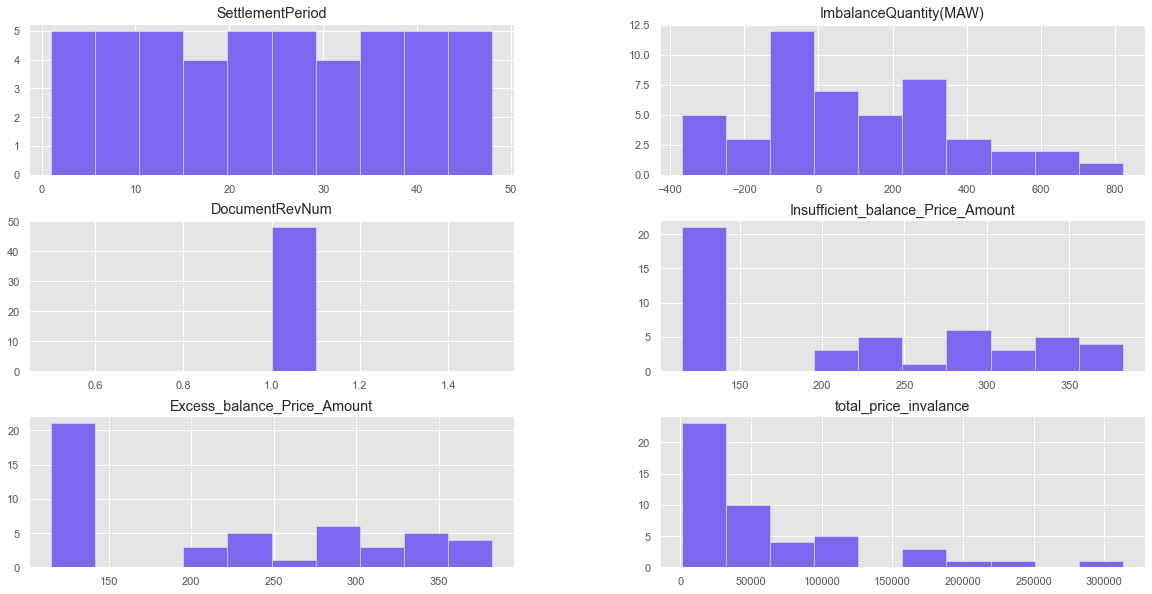

In [472]:
combined_B1780B1770.iloc[:,4:].hist(figsize=(20,10), color = 'mediumslateblue')
pass

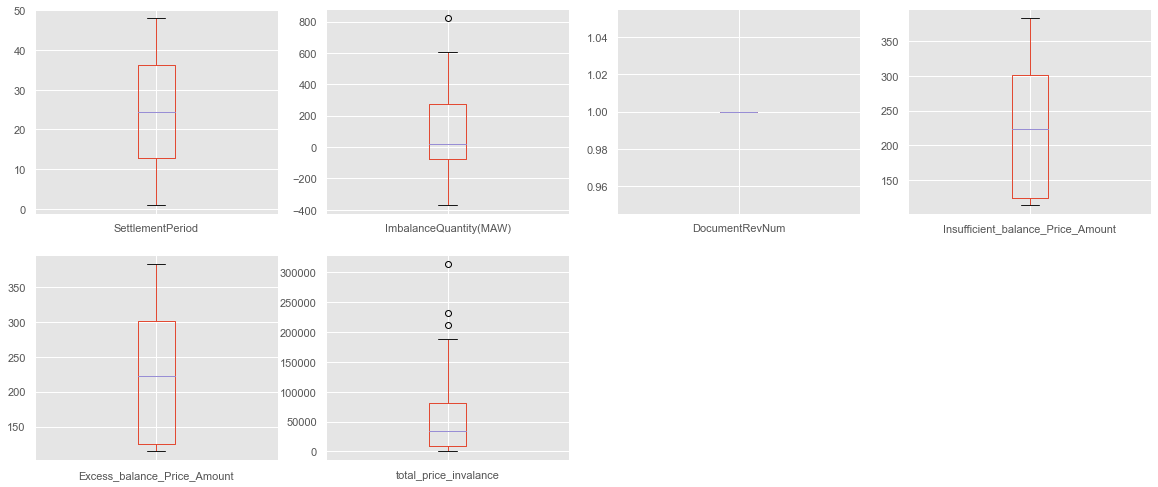

In [473]:
# Plot boxplots
combined_B1780B1770.plot(kind='box', subplots=True, figsize=(20,40),
                      layout=(9,4), sharex=False, sharey=False)
plt.show()

The circles that are outside the interval means that it is an outlier. The value is really big or small compared with the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


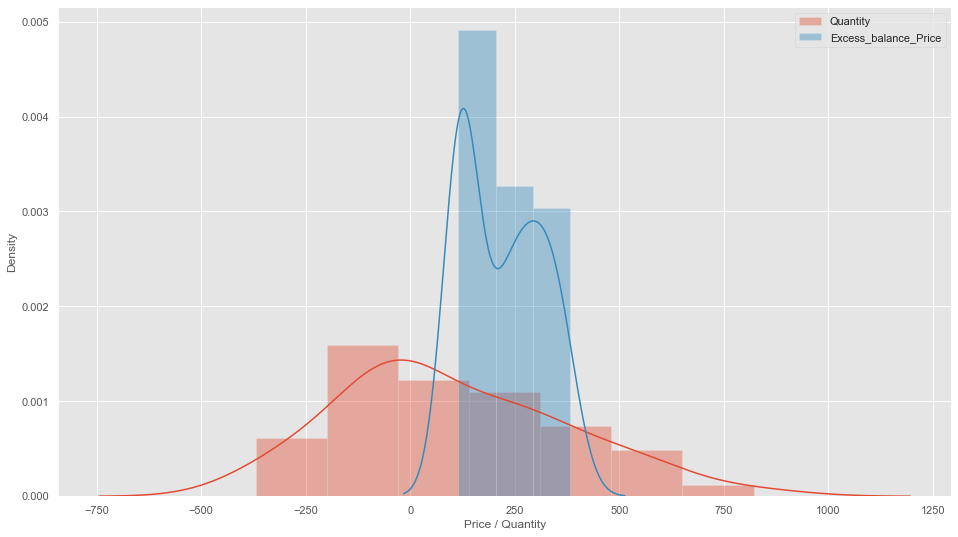

In [474]:
#Visualizing the data - displot
plot_price = sns.distplot(combined_B1780B1770["ImbalanceQuantity(MAW)"],label="Quantity")
plot_quantity = sns.distplot(combined_B1780B1770["Excess_balance_Price_Amount"],label="Excess_balance_Price")
plt.xlabel('Price / Quantity')
plt.legend();

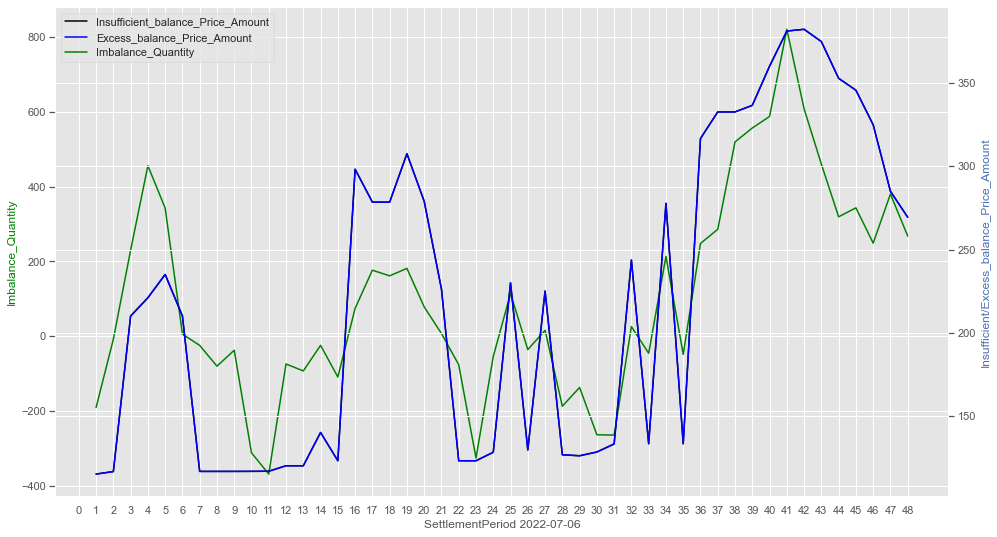

In [483]:
x = combined_B1780B1770["SettlementPeriod"]
y1 = combined_B1780B1770["ImbalanceQuantity(MAW)"]
y2 = combined_B1780B1770["Insufficient_balance_Price_Amount"]
y3 = combined_B1780B1770["Excess_balance_Price_Amount"]

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'green')
ax2 = ax1.twinx()
ax2.plot(x, y2,'black',label = 'Insufficient_balance_Price_Amount')
ax2.plot(x, y3,'blue',label = 'Excess_balance_Price_Amount')
ax2.plot(np.nan, 'green', label = 'Imbalance_Quantity')


ax1.set_xlabel('SettlementPeriod'+' '+ str(date))
ax1.set_ylabel('Imbalance_Quantity', color='green')
ax2.set_ylabel('Insufficient/Excess_balance_Price_Amount', color='b')

plt.xticks(np.arange(0, len(x)+1, 1))
plt.legend()
#plt.show()

The black line Insufficient_balance_Price_Amount might shows no data because have the same values than Excess_balance_Price_Amount so the are overlaping